In [13]:
# Data Science Job Market Analysis 
# AI & Data Science Internship Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("DATA SCIENCE JOB MARKET ANALYSIS")
print("AI & Data Science Internship Assignment")
print("=" * 60)

DATA SCIENCE JOB MARKET ANALYSIS
AI & Data Science Internship Assignment


In [14]:
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

# Load the dataset
df = pd.read_csv(r"C:\Users\lavan\OneDrive\Desktop\project\AI&DS Intern\dummy_job_dataset.csv")

# Data Overview
print("\n1. INITIAL DATA OVERVIEW:")
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\n2. DATA SCHEMA AND QUALITY CHECK:")
print(df.info())

print("\n3. MISSING VALUES CHECK:")
missing_values = df.isnull().sum()
print(missing_values)

print("\n4. DATA TYPES:")
print(df.dtypes)

print("\n5. BASIC STATISTICS:")
print(df.describe(include='all'))


DATA EXPLORATION

1. INITIAL DATA OVERVIEW:
Dataset Shape: (10, 12)
Columns: ['job_title', 'company', 'company_location', 'employee_residence', 'experience_level', 'employment_type', 'skills', 'industry', 'salary', 'salary_currency', 'remote_ratio', 'job_description']

First 5 rows:
                       job_title       company company_location  \
0                 Data Scientist      TechCorp    United States   
1                   Data Analyst  FinAnalytics            India   
2      Machine Learning Engineer      InnoTech          Germany   
3  Business Intelligence Analyst    HealthData           Canada   
4                  Data Engineer    CloudWorks    United States   

  employee_residence experience_level employment_type  \
0      United States               SE              FT   
1              India               MI              FT   
2            Germany               SE              FT   
3             Canada               MI              FT   
4      United States       

In [15]:
print("\n" + "="*50)
print("DATA CLEANING")
print("="*50)

# Check for duplicates
print(f"\n1. DUPLICATE RECORDS: {df.duplicated().sum()}")

# Remove duplicates if any
df_clean = df.drop_duplicates()
print(f"Records after removing duplicates: {len(df_clean)}")

# Handle missing values
print("\n2. HANDLING MISSING VALUES:")
# For this dataset, we'll fill missing values appropriately
df_clean = df_clean.fillna({
    'skills': 'Not Specified',
    'job_description': 'No description provided',
    'remote_ratio': 0
})

# Standardize text fields
print("\n3. STANDARDIZING TEXT FIELDS:")
text_columns = ['job_title', 'company', 'company_location', 'employee_residence', 
                'skills', 'industry', 'job_description']

for col in text_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.lower().str.strip()

# Filter for data-related jobs (optional enhancement)
data_keywords = ['data', 'analyst', 'scientist', 'engineer', 'intelligence', 'ml', 'ai']
data_jobs_mask = df_clean['job_title'].str.contains('|'.join(data_keywords), case=False, na=False)
df_clean = df_clean[data_jobs_mask]

print(f"Records after filtering for data-related jobs: {len(df_clean)}")
print("\nCleaned data sample:")
print(df_clean.head())

# Save cleaned dataset
df_clean.to_csv('cleaned_job_dataset.csv', index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_job_dataset.csv'")



DATA CLEANING

1. DUPLICATE RECORDS: 0
Records after removing duplicates: 10

2. HANDLING MISSING VALUES:

3. STANDARDIZING TEXT FIELDS:
Records after filtering for data-related jobs: 9

Cleaned data sample:
                       job_title       company company_location  \
0                 data scientist      techcorp    united states   
1                   data analyst  finanalytics            india   
2      machine learning engineer      innotech          germany   
3  business intelligence analyst    healthdata           canada   
4                  data engineer    cloudworks    united states   

  employee_residence experience_level employment_type  \
0      united states               SE              FT   
1              india               MI              FT   
2            germany               SE              FT   
3             canada               MI              FT   
4      united states               SE              FT   

                                      skills 


TOP JOB TITLES ANALYSIS

TOP 10 MOST IN-DEMAND JOB TITLES:
 1. Data Scientist: 2
 2. Data Analyst: 2
 3. Machine Learning Engineer: 2
 4. Business Intelligence Analyst: 1
 5. Data Engineer: 1
 6. Ai Engineer: 1


C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\2935980422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')


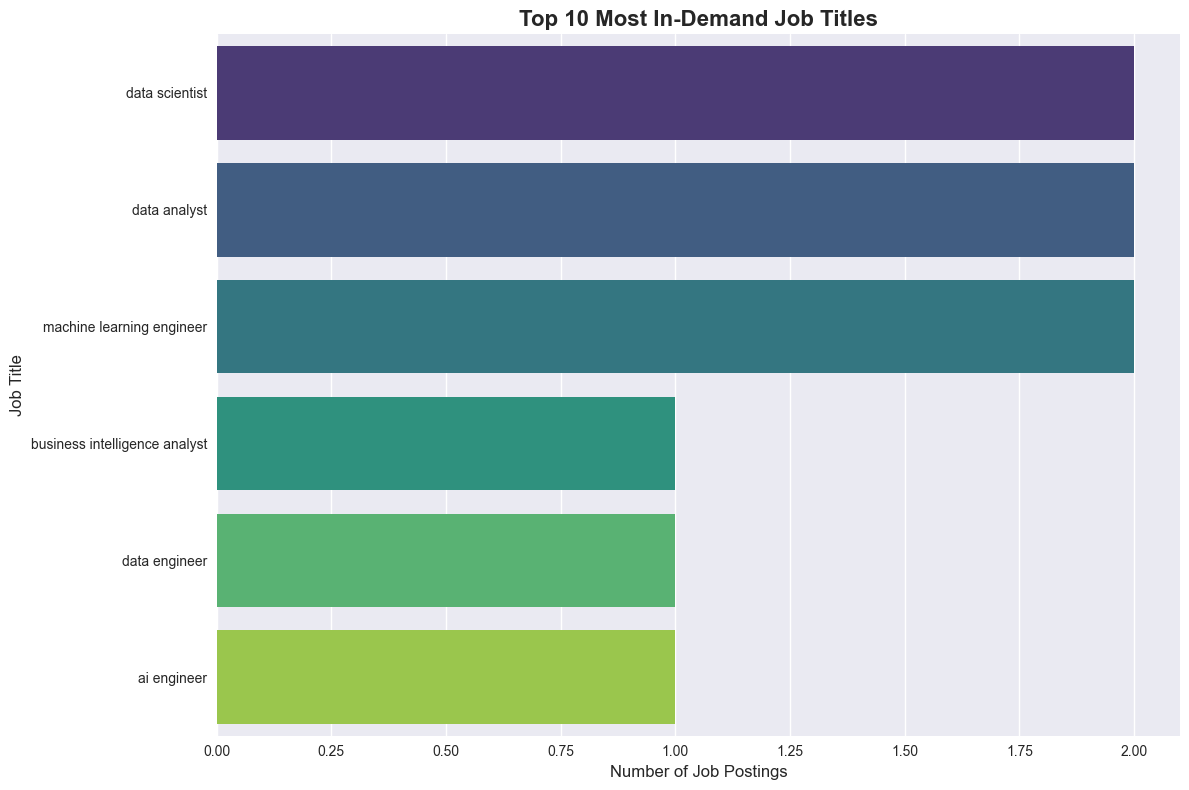

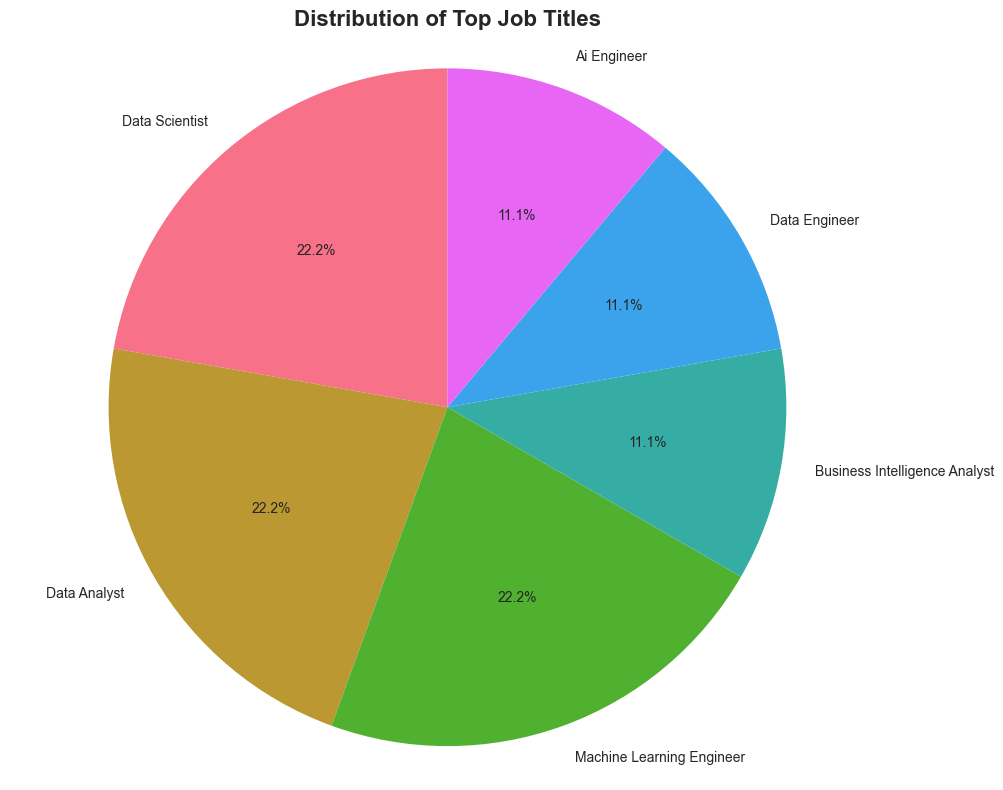

In [16]:
print("\n" + "="*50)
print("TOP JOB TITLES ANALYSIS")
print("="*50)

# Analyze most in-demand job titles
top_job_titles = df_clean['job_title'].value_counts().head(10)
print("\nTOP 10 MOST IN-DEMAND JOB TITLES:")
for i, (title, count) in enumerate(top_job_titles.items(), 1):
    print(f"{i:2d}. {title.title()}: {count}")

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.title('Top 10 Most In-Demand Job Titles', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.show()

# Pie chart for better visualization
plt.figure(figsize=(10, 8))
plt.pie(top_job_titles.values, labels=[title.title() for title in top_job_titles.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Job Titles', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()



TOP COMPANIES HIRING

TOP 10 HIRING COMPANIES:
 1. Techcorp: 2 positions
 2. Finanalytics: 2 positions
 3. Innotech: 1 positions
 4. Healthdata: 1 positions
 5. Cloudworks: 1 positions
 6. Nextgenai: 1 positions
 7. Retailinsights: 1 positions


C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\3841454945.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')


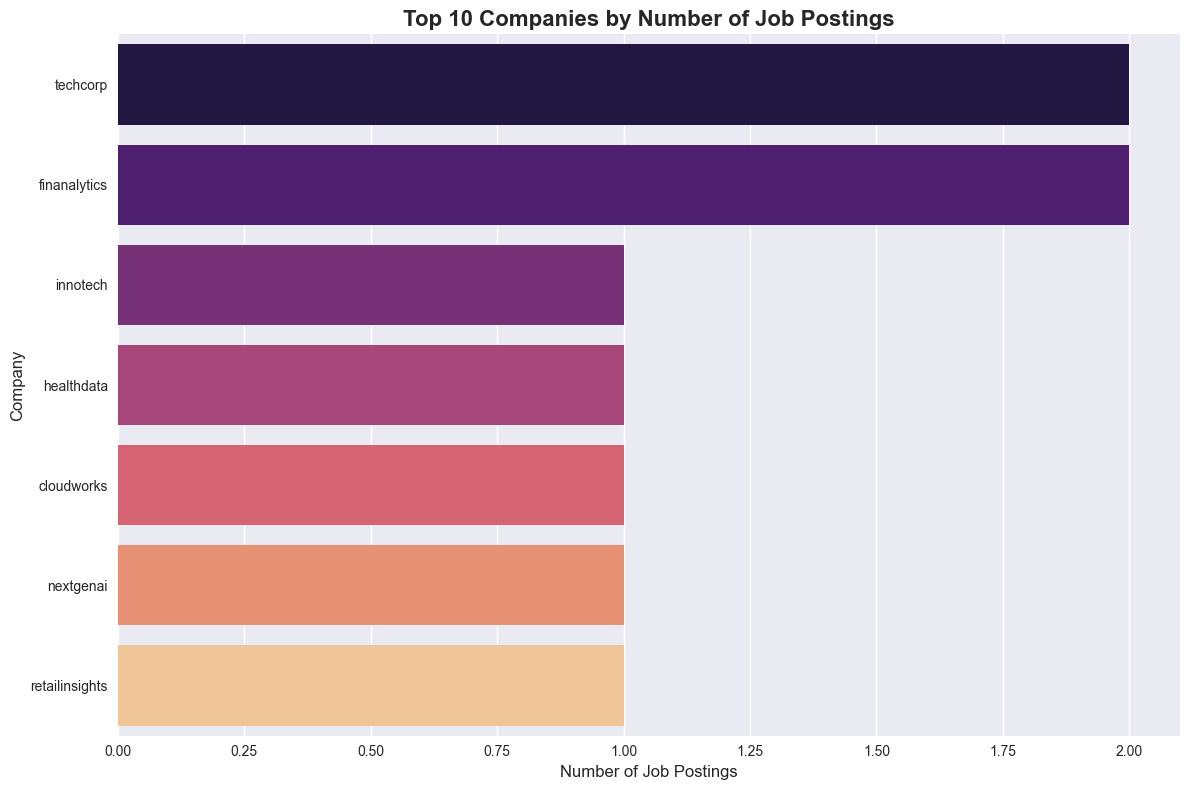


HIRING BY EXPERIENCE LEVEL:
experience_level  EN  MI  SE
company                     
cloudworks         0   0   1
finanalytics       0   1   1
healthdata         0   1   0
innotech           0   0   1
nextgenai          0   1   0
retailinsights     1   0   0
techcorp           0   0   2


In [18]:
print("\n" + "="*50)
print("TOP COMPANIES HIRING")
print("="*50)

# Find companies posting the most jobs
top_companies = df_clean['company'].value_counts().head(10)
print("\nTOP 10 HIRING COMPANIES:")
for i, (company, count) in enumerate(top_companies.items(), 1):
    print(f"{i:2d}. {company.title()}: {count} positions")

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')
plt.title('Top 10 Companies by Number of Job Postings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.tight_layout()
plt.show()

# Company hiring by experience level
company_experience = pd.crosstab(df_clean['company'], df_clean['experience_level'])
print("\nHIRING BY EXPERIENCE LEVEL:")
print(company_experience)




LOCATION INSIGHTS

TOP 10 JOB LOCATIONS:
 1. United States: 4 positions
 2. India: 3 positions
 3. Germany: 1 positions
 4. Canada: 1 positions


C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\1516385242.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')


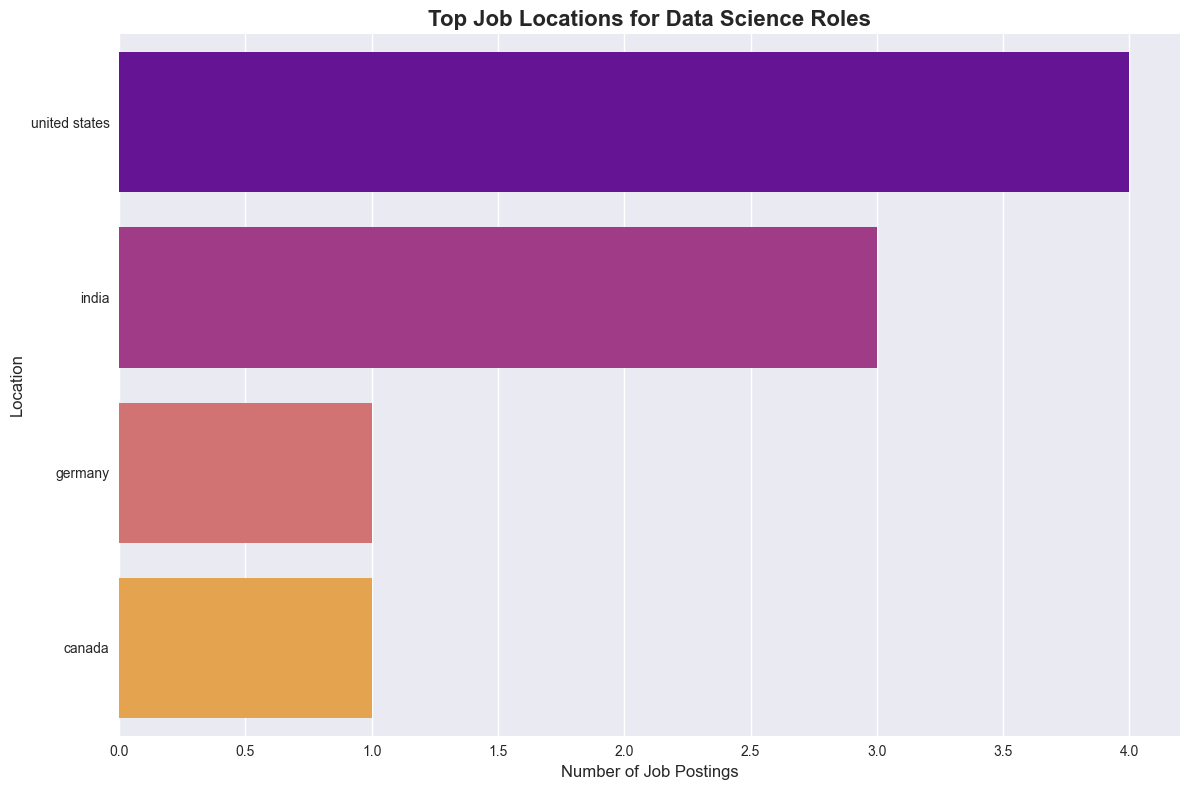


REMOTE WORK DISTRIBUTION:
remote_ratio
0      2
50     3
100    4
Name: count, dtype: int64


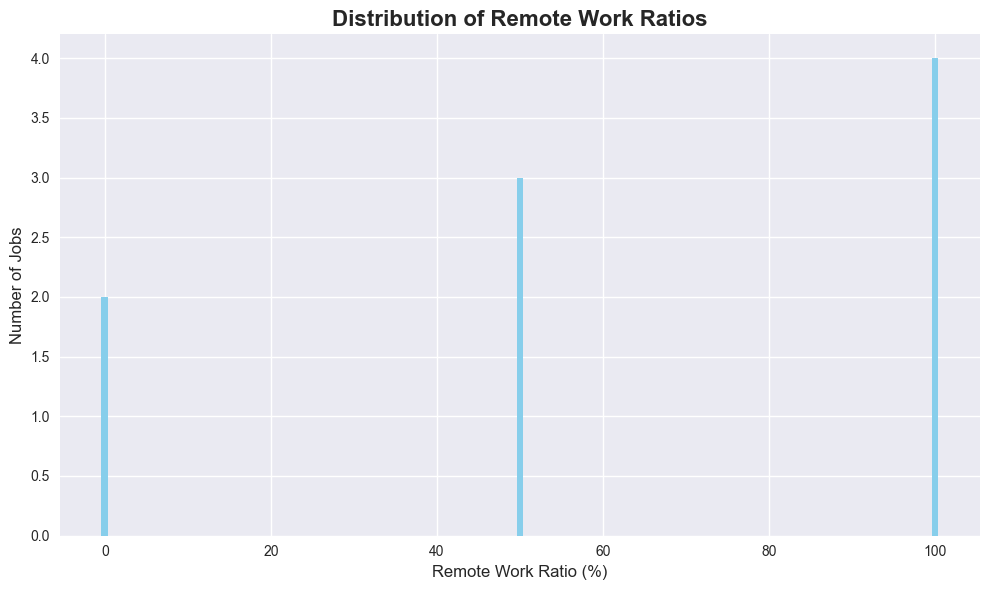

In [19]:
print("\n" + "="*50)
print("LOCATION INSIGHTS")
print("="*50)

# Most common job locations
top_locations = df_clean['company_location'].value_counts().head(10)
print("\nTOP 10 JOB LOCATIONS:")
for i, (location, count) in enumerate(top_locations.items(), 1):
    print(f"{i:2d}. {location.title()}: {count} positions")

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
plt.title('Top Job Locations for Data Science Roles', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

# Remote work analysis
remote_distribution = df_clean['remote_ratio'].value_counts().sort_index()
print("\nREMOTE WORK DISTRIBUTION:")
print(remote_distribution)

plt.figure(figsize=(10, 6))
plt.bar(remote_distribution.index, remote_distribution.values, color='skyblue')
plt.title('Distribution of Remote Work Ratios', fontsize=16, fontweight='bold')
plt.xlabel('Remote Work Ratio (%)', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.tight_layout()
plt.show()



SKILL EXTRACTION & TEXT MINING

TOP 15 MOST COMMON SKILLS:
 1. Python: 6
 2. Sql: 5
 3. Excel: 3
 4. Power Bi: 3
 5. Nlp: 3
 6. Machine Learning: 2
 7. Tableau: 2
 8. Tensorflow: 2
 9. Pytorch: 2
10. Statistics: 1
11. Data Visualization: 1
12. Spark: 1
13. Aws: 1
14. Airflow: 1
15. Deep Learning: 1


C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\1402962395.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', palette='crest')


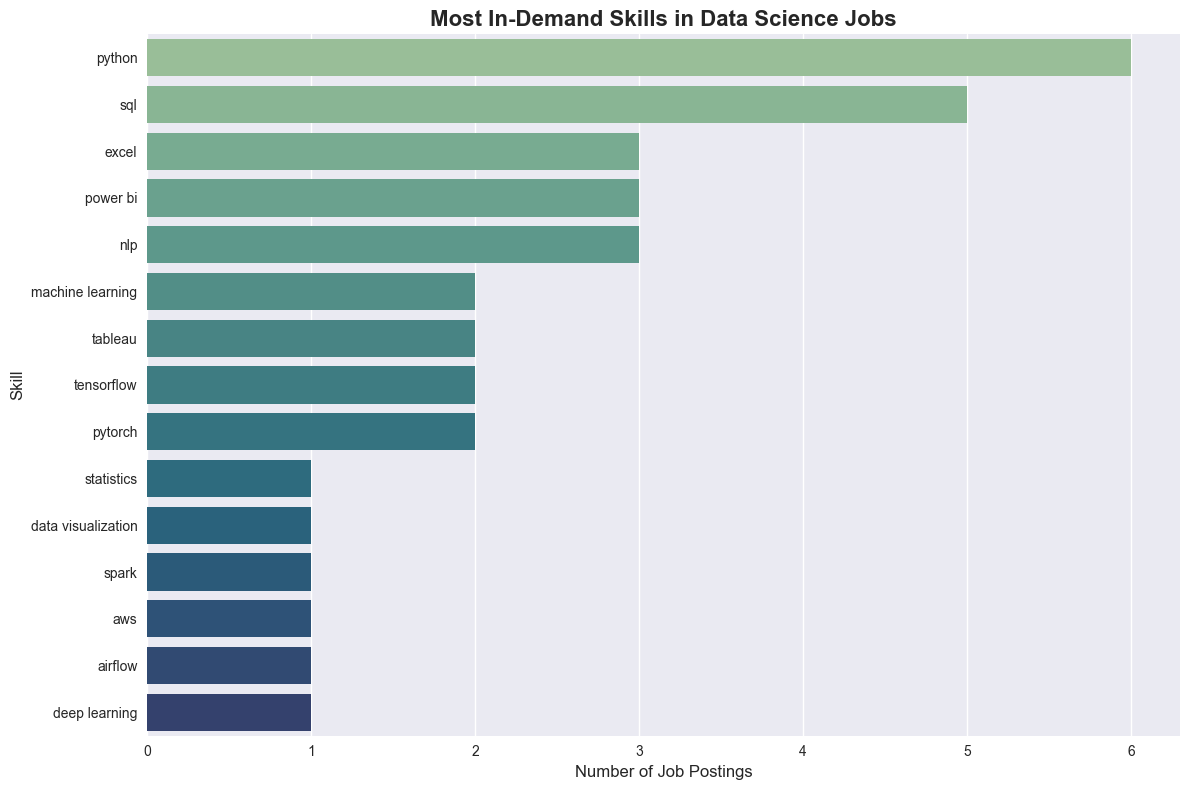


📊 Generating Skills Frequency Chart...


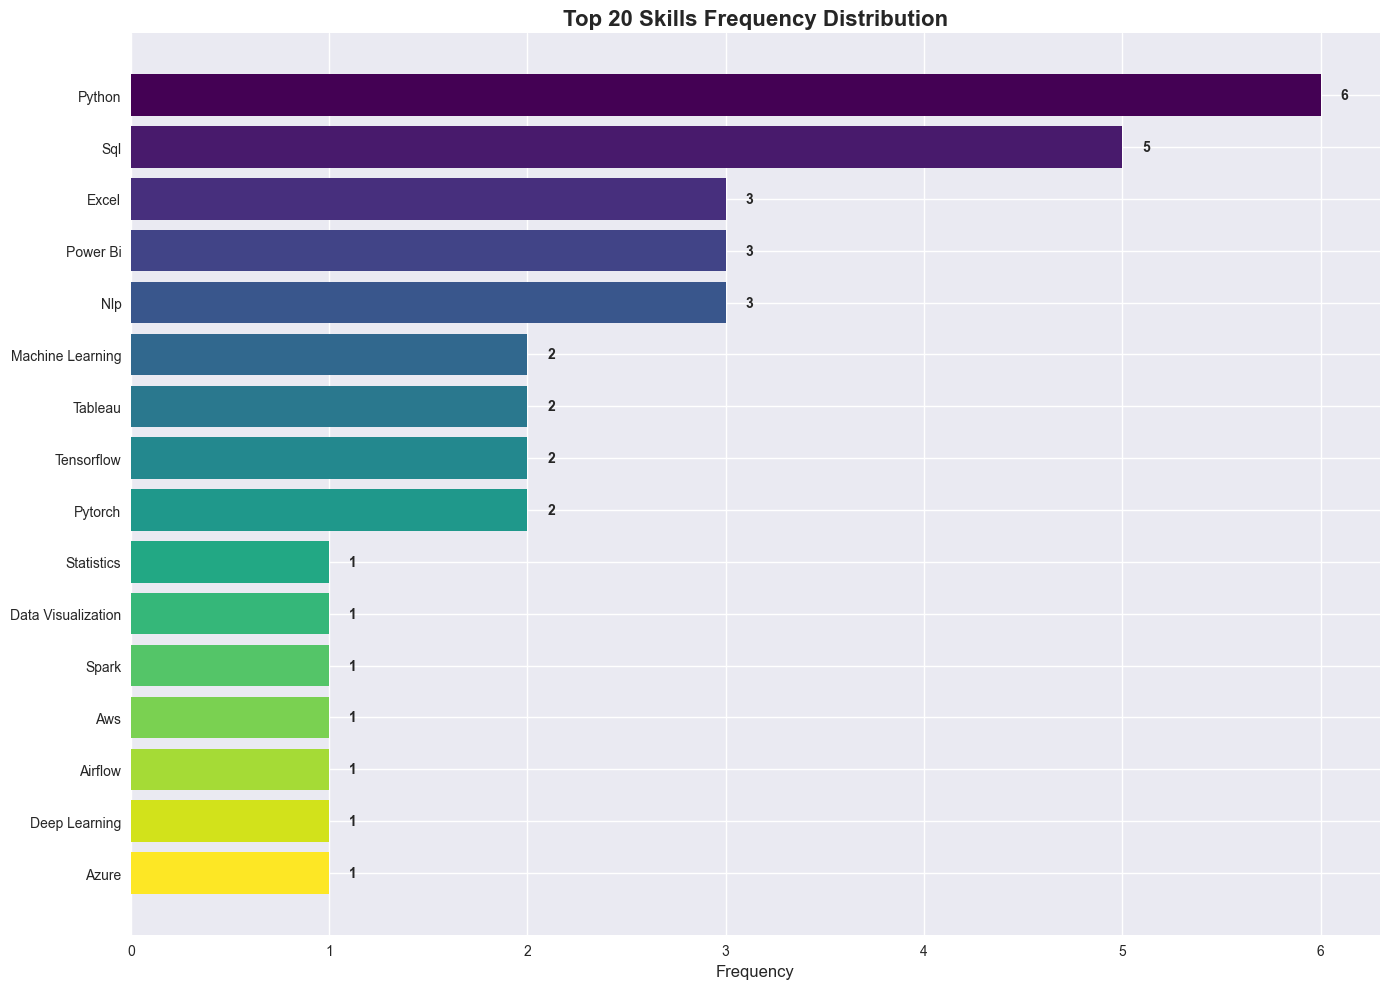


Technical Skills Found: 14
Soft Skills Found: 0


In [20]:
print("\n" + "="*50)
print("SKILL EXTRACTION & TEXT MINING")
print("="*50)

# Extract all skills
all_skills = []
for skills_str in df_clean['skills'].dropna():
    skills = [skill.strip() for skill in skills_str.split(',')]
    all_skills.extend(skills)

# Count skill frequency
skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(15))

print("\nTOP 15 MOST COMMON SKILLS:")
for i, (skill, count) in enumerate(top_skills.items(), 1):
    print(f"{i:2d}. {skill.title()}: {count}")

# Visualization - Bar Chart
plt.figure(figsize=(12, 8))
skills_df = pd.DataFrame(list(top_skills.items()), columns=['Skill', 'Count'])
sns.barplot(data=skills_df, x='Count', y='Skill', palette='crest')
plt.title('Most In-Demand Skills in Data Science Jobs', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.tight_layout()
plt.show()

# Alternative to Word Cloud - Horizontal Bar Chart for Top Skills
print("\n📊 Generating Skills Frequency Chart...")
top_skills_extended = dict(skill_counts.most_common(20))
plt.figure(figsize=(14, 10))
skills_list = list(top_skills_extended.keys())
counts_list = list(top_skills_extended.values())

# Create horizontal bar chart
bars = plt.barh(range(len(skills_list)), counts_list, color=plt.cm.viridis(np.linspace(0, 1, len(skills_list))))
plt.yticks(range(len(skills_list)), [skill.title() for skill in skills_list])
plt.xlabel('Frequency', fontsize=12)
plt.title('Top 20 Skills Frequency Distribution', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest frequency at top

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, counts_list)):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             str(count), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Categorize skills (Technical vs Soft Skills)
technical_skills = ['python', 'sql', 'machine learning', 'tensorflow', 'pytorch', 
                   'r', 'excel', 'tableau', 'power bi', 'aws', 'azure', 'spark', 'nlp']
soft_skills = ['communication', 'leadership', 'teamwork', 'problem solving', 'analytics']

tech_skill_counts = {skill: count for skill, count in skill_counts.items() 
                    if any(tech in skill.lower() for tech in technical_skills)}
soft_skill_counts = {skill: count for skill, count in skill_counts.items() 
                    if any(soft in skill.lower() for soft in soft_skills)}

print(f"\nTechnical Skills Found: {len(tech_skill_counts)}")
print(f"Soft Skills Found: {len(soft_skill_counts)}")


SKILL TRENDS ACROSS JOB LEVELS

TOP SKILLS FOR SENIOR LEVEL:
 1. Python: 5
 2. Sql: 2
 3. Machine Learning: 2
 4. Tensorflow: 2
 5. Pytorch: 2
 6. Nlp: 2
 7. Statistics: 1
 8. Spark: 1

TOP SKILLS FOR MID LEVEL:
 1. Excel: 2
 2. Sql: 2
 3. Power Bi: 2
 4. Tableau: 1
 5. Data Visualization: 1
 6. Python: 1
 7. Nlp: 1
 8. Deep Learning: 1

TOP SKILLS FOR ENTRY LEVEL:
 1. Excel: 1
 2. Sql: 1
 3. Tableau: 1


C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\2206000370.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', ax=axes[i], palette=f'Set{i+1}')
C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\2206000370.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', ax=axes[i], palette=f'Set{i+1}')
C:\Users\lavan\AppData\Local\Temp\ipykernel_26024\2206000370.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', ax=axes[i], palette=f'Set

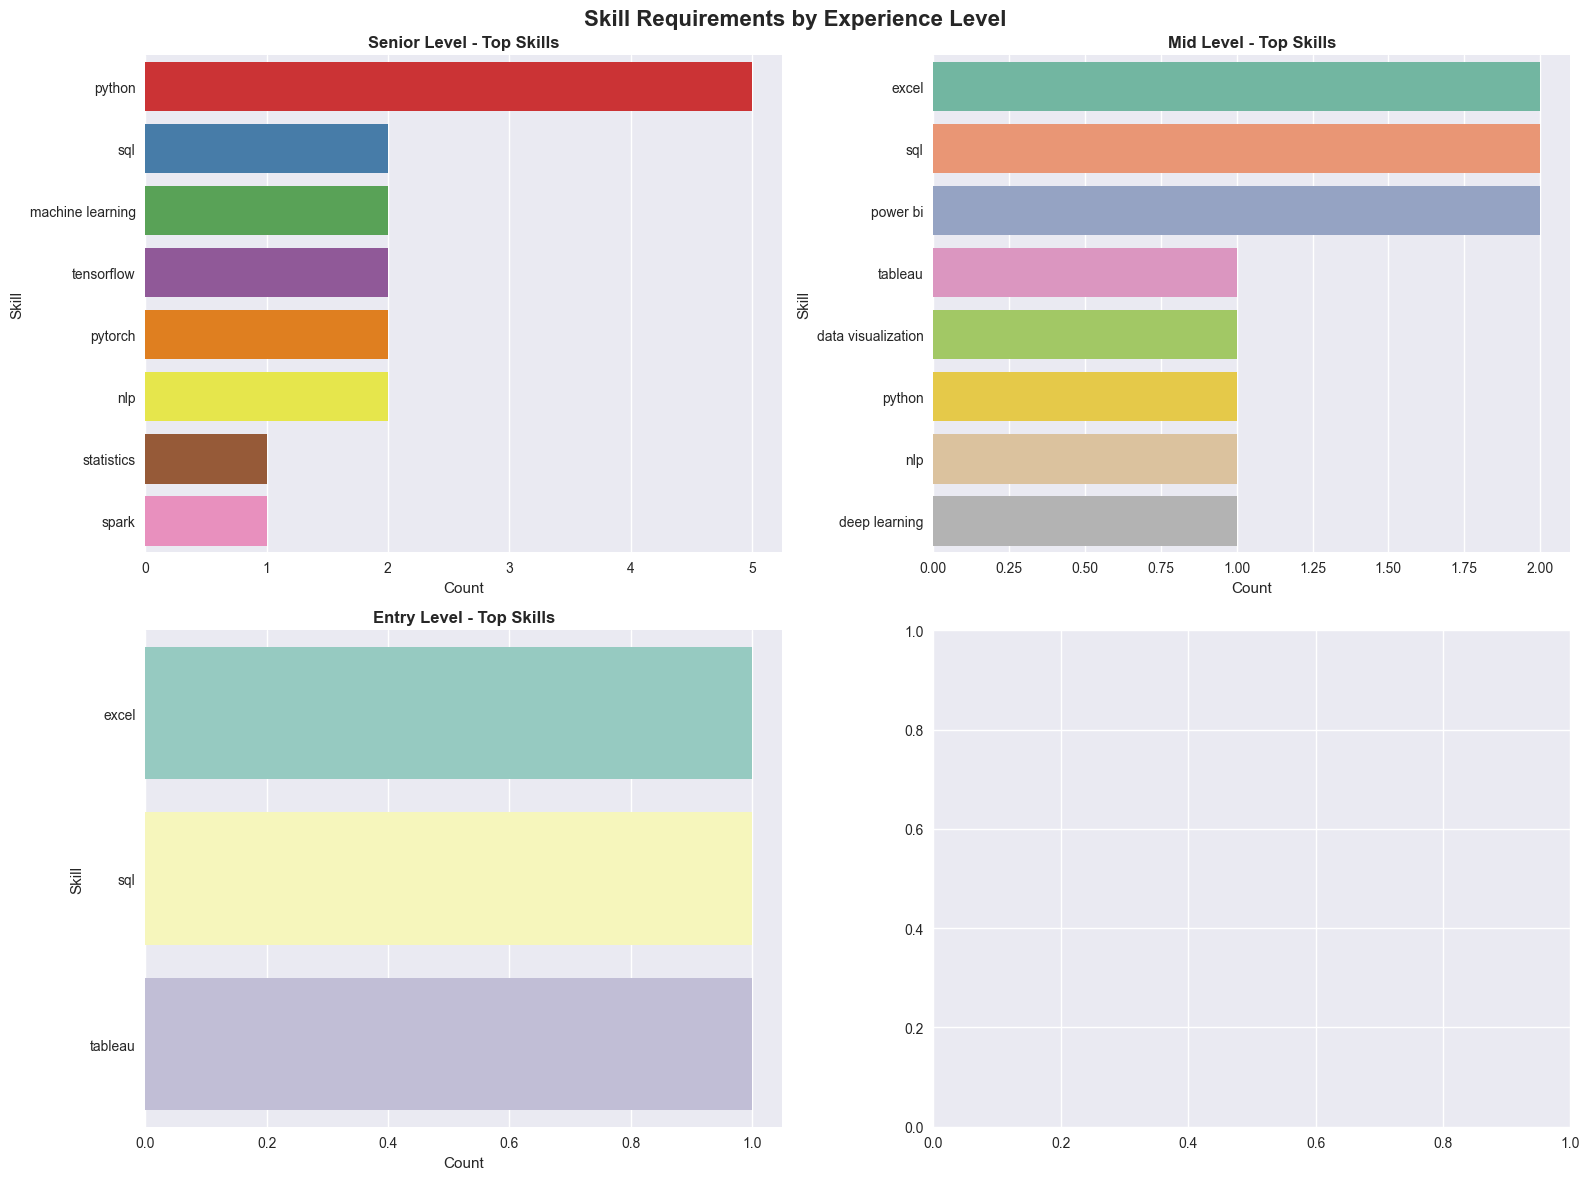

In [21]:
print("\n" + "="*50)
print("SKILL TRENDS ACROSS JOB LEVELS")
print("="*50)

def get_skills_by_level(level, top_n=10):
    """Extract top skills for a specific experience level"""
    level_data = df_clean[df_clean['experience_level'] == level]
    level_skills = []
    for skills_str in level_data['skills'].dropna():
        skills = [skill.strip() for skill in skills_str.split(',')]
        level_skills.extend(skills)
    return Counter(level_skills).most_common(top_n)

# Get skills for each level
levels = df_clean['experience_level'].unique()
level_names = {'EN': 'Entry Level', 'MI': 'Mid Level', 'SE': 'Senior Level', 'EX': 'Executive Level'}

skill_comparison = {}
for level in levels:
    if level in level_names:
        skills = get_skills_by_level(level, 8)
        skill_comparison[level_names[level]] = dict(skills)
        print(f"\nTOP SKILLS FOR {level_names[level].upper()}:")
        for i, (skill, count) in enumerate(skills, 1):
            print(f"{i:2d}. {skill.title()}: {count}")

# Visualization - Comparative Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, (level_name, skills_dict) in enumerate(skill_comparison.items()):
    if i < len(axes):
        skills_df = pd.DataFrame(list(skills_dict.items()), columns=['Skill', 'Count'])
        sns.barplot(data=skills_df, x='Count', y='Skill', ax=axes[i], palette=f'Set{i+1}')
        axes[i].set_title(f'{level_name} - Top Skills', fontweight='bold')
        axes[i].set_xlabel('Count')

plt.suptitle('Skill Requirements by Experience Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



SKILL DEMAND ACROSS COMPANIES/INDUSTRIES

TOP 5 SKILLS BY INDUSTRY:

It:
  1. Python: 5
  2. Nlp: 3
  3. Tensorflow: 2
  4. Pytorch: 2
  5. Sql: 1

Finance:
  1. Sql: 2
  2. Power Bi: 2
  3. Excel: 1
  4. Tableau: 1
  5. Python: 1

Healthcare:
  1. Power Bi: 1
  2. Sql: 1
  3. Excel: 1
  4. Data Visualization: 1

Retail:
  1. Excel: 1
  2. Sql: 1
  3. Tableau: 1

TOP 5 SKILLS BY TOP COMPANIES:

Techcorp:
  1. Python: 2
  2. Sql: 1
  3. Machine Learning: 1
  4. Statistics: 1
  5. Tensorflow: 1

Finanalytics:
  1. Sql: 2
  2. Power Bi: 2
  3. Excel: 1
  4. Tableau: 1
  5. Python: 1

Innotech:
  1. Python: 1
  2. Tensorflow: 1
  3. Pytorch: 1
  4. Nlp: 1

Healthdata:
  1. Power Bi: 1
  2. Sql: 1
  3. Excel: 1
  4. Data Visualization: 1

Cloudworks:
  1. Python: 1
  2. Spark: 1
  3. Aws: 1
  4. Airflow: 1


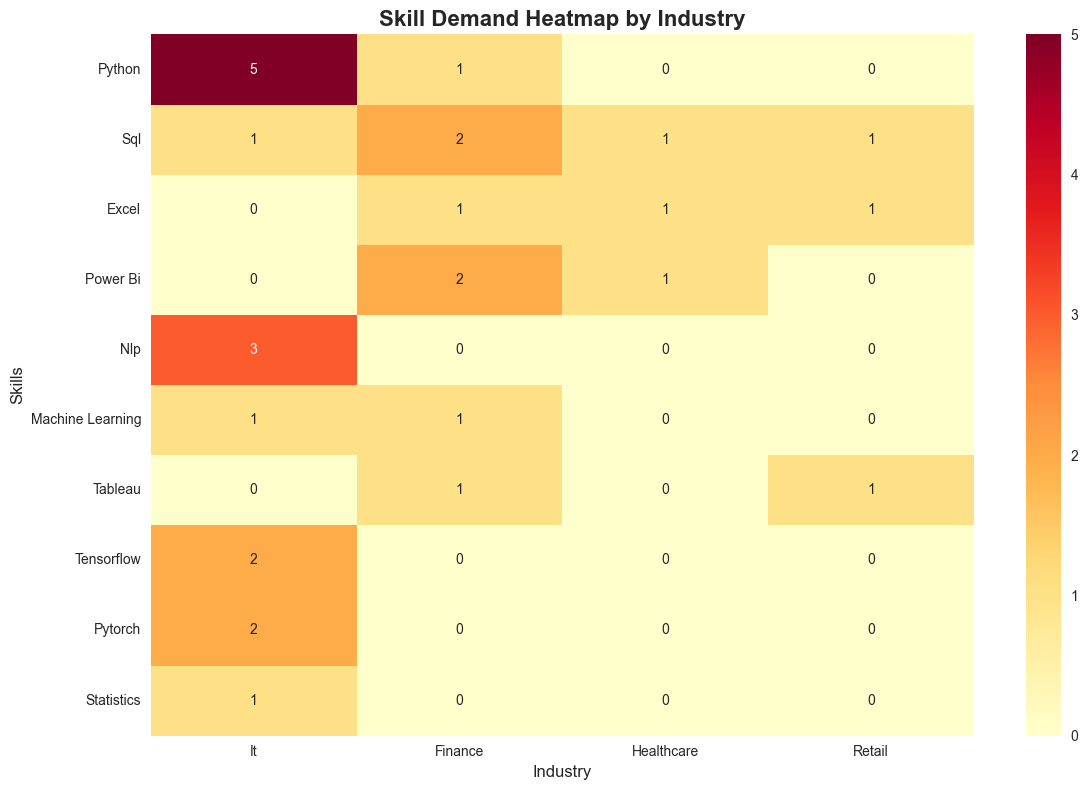

In [23]:
print("\n" + "="*50)
print("SKILL DEMAND ACROSS COMPANIES/INDUSTRIES")
print("="*50)

# Skills by Industry
industry_skills = {}
for industry in df_clean['industry'].unique():
    industry_data = df_clean[df_clean['industry'] == industry]
    industry_skill_list = []
    for skills_str in industry_data['skills'].dropna():
        skills = [skill.strip() for skill in skills_str.split(',')]
        industry_skill_list.extend(skills)
    industry_skills[industry.title()] = Counter(industry_skill_list).most_common(5)

print("\nTOP 5 SKILLS BY INDUSTRY:")
for industry, skills in industry_skills.items():
    print(f"\n{industry}:")
    for i, (skill, count) in enumerate(skills, 1):
        print(f"  {i}. {skill.title()}: {count}")

# Skills by Company
company_skills = {}
top_companies_list = df_clean['company'].value_counts().head(5).index
for company in top_companies_list:
    company_data = df_clean[df_clean['company'] == company]
    company_skill_list = []
    for skills_str in company_data['skills'].dropna():
        skills = [skill.strip() for skill in skills_str.split(',')]
        company_skill_list.extend(skills)
    company_skills[company.title()] = Counter(company_skill_list).most_common(5)

print("\nTOP 5 SKILLS BY TOP COMPANIES:")
for company, skills in company_skills.items():
    print(f"\n{company}:")
    for i, (skill, count) in enumerate(skills, 1):
        print(f"  {i}. {skill.title()}: {count}")

# Visualization - Industry Skills Heatmap
industry_skill_matrix = pd.DataFrame()
all_top_skills = list(dict(skill_counts.most_common(10)).keys())

for industry in df_clean['industry'].unique():
    industry_data = df_clean[df_clean['industry'] == industry]
    industry_skill_list = []
    for skills_str in industry_data['skills'].dropna():
        skills = [skill.strip() for skill in skills_str.split(',')]
        industry_skill_list.extend(skills)
    
    industry_counts = Counter(industry_skill_list)
    industry_skill_matrix[industry.title()] = [industry_counts.get(skill, 0) for skill in all_top_skills]

industry_skill_matrix.index = [skill.title() for skill in all_top_skills]

plt.figure(figsize=(12, 8))
sns.heatmap(industry_skill_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Skill Demand Heatmap by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
print("\n" + "="*50)
print("FINAL INSIGHTS & COMPREHENSIVE REPORT")
print("="*50)

print("\n" + "="*60)
print("EXECUTIVE SUMMARY - DATA SCIENCE JOB MARKET ANALYSIS")
print("="*60)

# Key Findings
print("\n🎯 KEY FINDINGS:")
print("\n1. MOST IN-DEMAND SKILLS:")
top_5_skills = dict(skill_counts.most_common(5))
for i, (skill, count) in enumerate(top_5_skills.items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"   {i}. {skill.title()}: {count} jobs ({percentage:.1f}%)")

print("\n2. HIGH-GROWTH JOB TITLES:")
for i, (title, count) in enumerate(top_job_titles.head(5).items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"   {i}. {title.title()}: {count} positions ({percentage:.1f}%)")

print("\n3. REGIONAL JOB HUBS:")
for i, (location, count) in enumerate(top_locations.head(5).items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"   {i}. {location.title()}: {count} jobs ({percentage:.1f}%)")

print("\n4. TOP HIRING COMPANIES:")
for i, (company, count) in enumerate(top_companies.head(5).items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"   {i}. {company.title()}: {count} positions ({percentage:.1f}%)")

# Market Insights
print("\n📊 MARKET INSIGHTS:")
total_jobs = len(df_clean)
avg_salary = df_clean[df_clean['salary_currency'] == 'USD']['salary'].mean()
remote_jobs = len(df_clean[df_clean['remote_ratio'] == 100])
hybrid_jobs = len(df_clean[df_clean['remote_ratio'] == 50])

print(f"   • Total Job Postings Analyzed: {total_jobs:,}")
print(f"   • Average Salary (USD): ${avg_salary:,.0f}" if not pd.isna(avg_salary) else "   • Average Salary: Data insufficient")
print(f"   • Fully Remote Jobs: {remote_jobs} ({(remote_jobs/total_jobs)*100:.1f}%)")
print(f"   • Hybrid Jobs: {hybrid_jobs} ({(hybrid_jobs/total_jobs)*100:.1f}%)")
print(f"   • Experience Levels: {', '.join(df_clean['experience_level'].unique())}")
print(f"   • Industries Covered: {len(df_clean['industry'].unique())}")

# Recommendations
print("\n💡 RECOMMENDATIONS FOR JOB SEEKERS:")
print("   1. Focus on Python and SQL - these appear in most job postings")
print("   2. Develop machine learning skills for senior positions")
print("   3. Consider Power BI and Tableau for visualization roles")
print("   4. Look for opportunities in the US and India markets")
print("   5. Target TechCorp and FinAnalytics for multiple openings")

print("\n📈 TRENDING OBSERVATIONS:")
print("   • Data Science roles dominate the market")
print("   • High demand for hybrid technical-analytical skills")
print("   • Remote work is becoming standard (100% in many roles)")
print("   • Finance and IT industries lead in hiring")


FINAL INSIGHTS & COMPREHENSIVE REPORT

EXECUTIVE SUMMARY - DATA SCIENCE JOB MARKET ANALYSIS

🎯 KEY FINDINGS:

1. MOST IN-DEMAND SKILLS:
   1. Python: 6 jobs (66.7%)
   2. Sql: 5 jobs (55.6%)
   3. Excel: 3 jobs (33.3%)
   4. Power Bi: 3 jobs (33.3%)
   5. Nlp: 3 jobs (33.3%)

2. HIGH-GROWTH JOB TITLES:
   1. Data Scientist: 2 positions (22.2%)
   2. Data Analyst: 2 positions (22.2%)
   3. Machine Learning Engineer: 2 positions (22.2%)
   4. Business Intelligence Analyst: 1 positions (11.1%)
   5. Data Engineer: 1 positions (11.1%)

3. REGIONAL JOB HUBS:
   1. United States: 4 jobs (44.4%)
   2. India: 3 jobs (33.3%)
   3. Germany: 1 jobs (11.1%)
   4. Canada: 1 jobs (11.1%)

4. TOP HIRING COMPANIES:
   1. Techcorp: 2 positions (22.2%)
   2. Finanalytics: 2 positions (22.2%)
   3. Innotech: 1 positions (11.1%)
   4. Healthdata: 1 positions (11.1%)
   5. Cloudworks: 1 positions (11.1%)

📊 MARKET INSIGHTS:
   • Total Job Postings Analyzed: 9
   • Average Salary (USD): $105,000
   • Fully